### Analysis Of Employee Exit Surveys
In this project, we are going to concentrate on the two Employee Exit Survey Datasets,to understand the resignation of employees from the company over the period of the time.Datasets are contributed by  Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

Our goal is aligned with:

1)Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2)Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

TO get viable answers to the questions,we assume our clients(stakeholders) want combine the results for both surveys.

In [64]:
import numpy as np
import pandas as pd
dete_survey=pd.read_csv("dete_survey.csv")
tafe_survey=pd.read_csv("tafe_survey.csv")

In [65]:
dete_survey.head(4)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN


In [66]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [67]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [68]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

1)THere are many columns in both dasets which are not needed for analysis.we need to delete them.

2)we need to convert not stated values to nan.Not stated values are missing values.

3)THere are multiple columns in both datasets which has same values or same meaning with different column names.

In [69]:
#Identify Missing Values and Drop Unneccessary Columns

dete_survey=pd.read_csv("dete_survey.csv",na_values="Not Stated")

Following columns are deleted  which are found unnecessary to put in our analysis.When we inspect these columns, the values are not substanial benefit to our analysis. 

In [70]:
dete_survey.columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [71]:
tafe_survey.columns[17:66]

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

In [72]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

Each dataframes contains columns which have same meaning but different column names.We are looking at the column names similar to both datasets:

<img src = "untitled.png">

These are column names we are looking for our analysis.So we combine them.Before combining, we rename the columns in both datasets in standaradised form.


In [73]:
dete_survey_updated.columns=dete_survey_updated.columns.str.strip().str.replace(" ","_").str.upper()
dete_survey_updated.columns

Index(['ID', 'SEPARATIONTYPE', 'CEASE_DATE', 'DETE_START_DATE',
       'ROLE_START_DATE', 'POSITION', 'CLASSIFICATION', 'REGION',
       'BUSINESS_UNIT', 'EMPLOYMENT_STATUS', 'CAREER_MOVE_TO_PUBLIC_SECTOR',
       'CAREER_MOVE_TO_PRIVATE_SECTOR', 'INTERPERSONAL_CONFLICTS',
       'JOB_DISSATISFACTION', 'DISSATISFACTION_WITH_THE_DEPARTMENT',
       'PHYSICAL_WORK_ENVIRONMENT', 'LACK_OF_RECOGNITION',
       'LACK_OF_JOB_SECURITY', 'WORK_LOCATION', 'EMPLOYMENT_CONDITIONS',
       'MATERNITY/FAMILY', 'RELOCATION', 'STUDY/TRAVEL', 'ILL_HEALTH',
       'TRAUMATIC_INCIDENT', 'WORK_LIFE_BALANCE', 'WORKLOAD',
       'NONE_OF_THE_ABOVE', 'GENDER', 'AGE', 'ABORIGINAL', 'TORRES_STRAIT',
       'SOUTH_SEA', 'DISABILITY', 'NESB'],
      dtype='object')

In [74]:
##Updating column names in tafe survey to match with dete_survey_updated
name_change= {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [75]:
## check the columns
tafe_survey_updated=tafe_survey_updated.rename(name_change,axis=1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

###### Filtering the data

In [76]:
#There are various reasons listed for seperationtype in both datasets.
#for our analysis we are exclusively focus on sepration type-Resignation.Filtering out the Resignation alone from both datasets
resignation_pattern="Resignation"
dete_resignations=dete_survey_updated[dete_survey_updated['SEPARATIONTYPE'].str.contains(resignation_pattern)]

#dete_resignations["SEPARATIONTYPE"]= "Resignation".copy()
dete_resignations.loc[:,"SEPARATIONTYPE"] = "Resignation"
dete_resignations.head()

C:\Users\gsara\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ID,SEPARATIONTYPE,CEASE_DATE,DETE_START_DATE,ROLE_START_DATE,POSITION,CLASSIFICATION,REGION,BUSINESS_UNIT,EMPLOYMENT_STATUS,...,WORK_LIFE_BALANCE,WORKLOAD,NONE_OF_THE_ABOVE,GENDER,AGE,ABORIGINAL,TORRES_STRAIT,SOUTH_SEA,DISABILITY,NESB
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [77]:
resignation_pattern="Resignation"
tafe_resignations=tafe_survey_updated[tafe_survey_updated['separationtype']=="Resignation"].copy()
tafe_resignations.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


###### Verify the data

The two important columns in both dataset are cease date and start date,which shows the employee duration in the company.But both columns in the dataset are not clean.Both columns have to be filtered such that they contain only the years.Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [78]:
dete_resignations["CEASE_DATE"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: CEASE_DATE, dtype: int64

In [79]:
dete_resignations["CEASE_DATE"]=dete_resignations["CEASE_DATE"].str.split("/").str[-1]
dete_resignations["CEASE_DATE"]=dete_resignations["CEASE_DATE"].astype(float).copy()

C:\Users\gsara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gsara\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
dete_resignations["DETE_START_DATE"].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: DETE_START_DATE, dtype: int64

In [81]:
tafe_resignations["cease_date"].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [82]:
dete_resignations["CEASE_DATE"].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: CEASE_DATE, dtype: int64

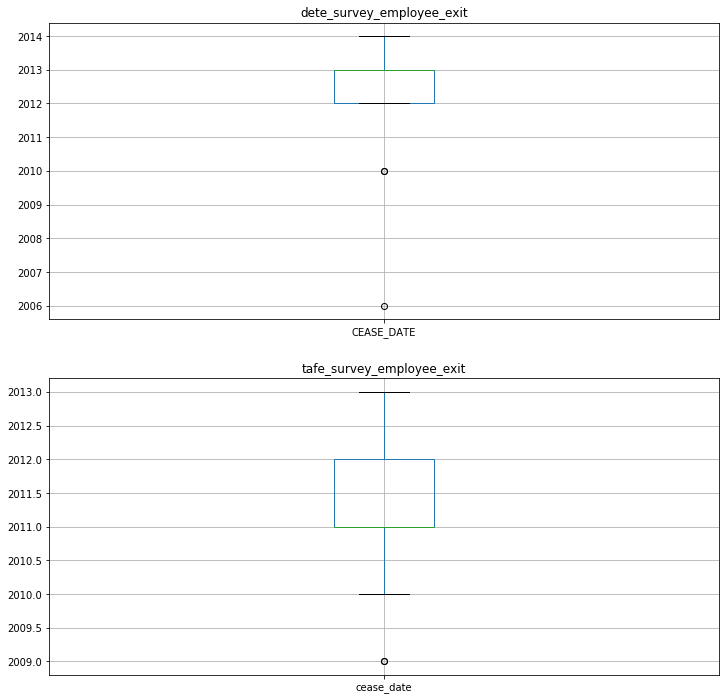

In [83]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))
fig.add_subplot(2,1,1)
dete_resignations.boxplot(column=["CEASE_DATE"])
plt.title("dete_survey_employee_exit")
fig.add_subplot(2,1,2)
tafe_resignations.boxplot(column=["cease_date"])
plt.title("tafe_survey_employee_exit")
plt.show()

Below are our Findings:

IN both surveys,there is a siginificant difference in number of employees in exited in a given period of time.While tafe survey suggest that maximum number of employees resignation happend in 2011,the dete survey emphasis the resignation happened in 2013.
Since we aren't concerned with analyzing the results by year, we'll leave them as is.

##### Creating a new columnn

Our goal is to find how long the employees remain in the company before resigning his position due to dissatifaction.

The tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service.

Below, we calculate the years of service in the dete_survey_updated dataframe by subtracting the dete_start_date from the cease_date and create a new column named institute_service.

In [84]:
dete_resignations['INSTITUTE_SERVICE'] = dete_resignations['CEASE_DATE'] - dete_resignations['DETE_START_DATE']


dete_resignations['INSTITUTE_SERVICE'].head()

C:\Users\gsara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: INSTITUTE_SERVICE, dtype: float64

Our goal is identify whether the long term or short trem employees exited from organisation due to dissatisfaction.We have many column which states resaoning of employees resignation.We focus on the columns which categorize employees as "dissatisfied" with the company from each dataframe.

tafe_survey_updated:

1)Contributing Factors. Dissatisfaction

2)Contributing Factors. Job Dissatisfaction

detesurveyupdated:

1 job_dissatisfaction

2 dissatisfaction_with_the_department

3 physical_work_environment

4 lack_of_recognition

5 lack_of_job_security

6 work_location

7 employment_conditions

8 work_life_balance

9 workload

The idea is when the employee in both survey mentioned any of the above reasons,we mark true in the new column named "Dissatisfied".New column in both dataframes have following values:

True: indicates a person resigned because they were dissatisfied in some way

False: indicates a person resigned because of a reason other than dissatisfaction with the job

NaN: indicates the value is missing

In [85]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [86]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [87]:
##Clearly from the above value counts, we can say some of people resigned due to dissatisfaction.Now,in new column we 
#have to assign the value as true if any of above reasons mentioned or assign the values as False if above reasons listed
##as"-" are mentioned in both columns or nan

def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val=="-":
        return False
    else:
        return True
        

In [88]:
tafe_resignations["Dissatisfied"]=tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)

In [89]:
tafe_resignations["Dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: Dissatisfied, dtype: int64

In [90]:
##Let us follw the same steps for dete_resignations dataframe to create a new colum dissatisfaction

In [91]:
k=["JOB_DISSATISFACTION","DISSATISFACTION_WITH_THE_DEPARTMENT","PHYSICAL_WORK_ENVIRONMENT","LACK_OF_RECOGNITION"
                  ,"LACK_OF_JOB_SECURITY","WORK_LOCATION","EMPLOYMENT_CONDITIONS","WORK_LIFE_BALANCE","WORKLOAD"]

In [92]:
for i in k:
    print(i,"Value count")
    print(dete_resignations[i].value_counts(dropna=False))
    print()
    
    

JOB_DISSATISFACTION Value count
False    270
True      41
Name: JOB_DISSATISFACTION, dtype: int64

DISSATISFACTION_WITH_THE_DEPARTMENT Value count
False    282
True      29
Name: DISSATISFACTION_WITH_THE_DEPARTMENT, dtype: int64

PHYSICAL_WORK_ENVIRONMENT Value count
False    305
True       6
Name: PHYSICAL_WORK_ENVIRONMENT, dtype: int64

LACK_OF_RECOGNITION Value count
False    278
True      33
Name: LACK_OF_RECOGNITION, dtype: int64

LACK_OF_JOB_SECURITY Value count
False    297
True      14
Name: LACK_OF_JOB_SECURITY, dtype: int64

WORK_LOCATION Value count
False    293
True      18
Name: WORK_LOCATION, dtype: int64

EMPLOYMENT_CONDITIONS Value count
False    288
True      23
Name: EMPLOYMENT_CONDITIONS, dtype: int64

WORK_LIFE_BALANCE Value count
False    243
True      68
Name: WORK_LIFE_BALANCE, dtype: int64

WORKLOAD Value count
False    284
True      27
Name: WORKLOAD, dtype: int64



In [93]:
dete_resignations["Dissatisfied"]=dete_resignations[["JOB_DISSATISFACTION","DISSATISFACTION_WITH_THE_DEPARTMENT","PHYSICAL_WORK_ENVIRONMENT","LACK_OF_RECOGNITION"
                  ,"LACK_OF_JOB_SECURITY","WORK_LOCATION","EMPLOYMENT_CONDITIONS","WORK_LIFE_BALANCE","WORKLOAD"]].any(axis=1,skipna=False)

C:\Users\gsara\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
dete_resignations["Dissatisfied"].value_counts()

False    162
True     149
Name: Dissatisfied, dtype: int64

In [95]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up=dete_resignations.copy()

In [96]:
##converting all the columns to lower case
tafe_resignations_up.columns=tafe_resignations_up.columns.str.lower()
dete_resignations_up.columns=dete_resignations_up.columns.str.lower()

### Combing the dataframes
Noe we have cleaned,filtered and verified the data in both surveys dataset.To achieve our goal we must combine the datasets.Before COmbing the datasets, we need to deicated column in each dataframe to indentify which easily distinguish between the two surveys

In [97]:
##column named institute to dete_resignations_up.##column named institute to tafe_resignations_up
tafe_resignations_up["institute"]="DETE"
dete_resignations_up["institute"]="TAFE"

In [98]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up],ignore_index=True)


C:\Users\gsara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [99]:
##Checking how many values are present in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
job_dissatisfaction                                    311
lack_of_job_security                                   311
lack_of_recognition                                    311
maternity/family                                       311
relocation                                             311
physical_work_environment                              3

In [100]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

In [101]:
combined_updated

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.000000e+00,TAFE,7,Teacher,Resignation
1,41-45,2012.0,True,Permanent Full-time,Female,6.000000e+00,TAFE,18,Guidance Officer,Resignation
2,31-35,2012.0,False,Permanent Full-time,Female,9.000000e+00,TAFE,3,Teacher,Resignation
3,46-50,2012.0,True,Permanent Part-time,Female,1.000000e+01,TAFE,15,Teacher Aide,Resignation
4,31-35,2012.0,False,Permanent Full-time,Male,1.200000e+01,TAFE,3,Teacher,Resignation
...,...,...,...,...,...,...,...,...,...,...
646,21 25,2013.0,False,Temporary Full-time,Male,6.350660e+17,DETE,5-6,Operational (OO),Resignation
647,51-55,2013.0,False,Temporary Full-time,Male,6.350668e+17,DETE,1-2,Teacher (including LVT),Resignation
648,NaN,2013.0,False,NaN,NaN,6.350677e+17,DETE,NaN,NaN,Resignation
649,51-55,2013.0,False,Permanent Full-time,Female,6.350704e+17,DETE,5-6,Teacher (including LVT),Resignation


##### Tranforming data in institute service

Our journey to reaching the goal has reached final stage - analysis of data.So far what we did was cleaning and filtering the datasets according to our needs.One category we need to transform is,institute serivice which has values like this:

NaN                 88

Less than 1 year    73

1-2                 64



To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on this article(https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

we use the following modified definitions :

New: Less than 3 years at a company

Experienced: 3-6 years at a company

Established: 7-10 years at a company

Veteran: 11 or more years at a company

In [102]:
#Unique values in institute_service

combined_updated['institute_service'].value_counts(dropna=False)


NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


In [103]:
combined_updated['institute_service_new']=combined_updated['institute_service'].astype(str).str.extract(r'(\d+)')
#Refer: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html
#Refer: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html
combined_updated['institute_service_new'] = combined_updated['institute_service_new'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_new'].value_counts().head(5)

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
Name: institute_service_new, dtype: int64

In [104]:
def upval(value):
    if value < 3:
        return "New: Less than 3 years at a company"
    elif 3 <= value < 7:
        return "Experienced: 3-6 years at a company"
    elif 7 <= value < 11:
        return "Established: 7-10 years at a company"
    elif value >= 11:
        return "Veteran: 11 or more years at a company"
    else: #pd.isnull(value):
        return np.nan

In [105]:
combined_updated['service_cat']=combined_updated['institute_service_new'].apply(upval)

In [106]:
combined_updated['service_cat'].value_counts(dropna=False)

New: Less than 3 years at a company       193
Experienced: 3-6 years at a company       172
Veteran: 11 or more years at a company    136
NaN                                        88
Established: 7-10 years at a company       62
Name: service_cat, dtype: int64

In [107]:
combined_updated

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,institute_service_new,service_cat
0,36-40,2012.0,False,Permanent Full-time,Female,4.000000e+00,TAFE,7,Teacher,Resignation,7.0,Established: 7-10 years at a company
1,41-45,2012.0,True,Permanent Full-time,Female,6.000000e+00,TAFE,18,Guidance Officer,Resignation,18.0,Veteran: 11 or more years at a company
2,31-35,2012.0,False,Permanent Full-time,Female,9.000000e+00,TAFE,3,Teacher,Resignation,3.0,Experienced: 3-6 years at a company
3,46-50,2012.0,True,Permanent Part-time,Female,1.000000e+01,TAFE,15,Teacher Aide,Resignation,15.0,Veteran: 11 or more years at a company
4,31-35,2012.0,False,Permanent Full-time,Male,1.200000e+01,TAFE,3,Teacher,Resignation,3.0,Experienced: 3-6 years at a company
...,...,...,...,...,...,...,...,...,...,...,...,...
646,21 25,2013.0,False,Temporary Full-time,Male,6.350660e+17,DETE,5-6,Operational (OO),Resignation,5.0,Experienced: 3-6 years at a company
647,51-55,2013.0,False,Temporary Full-time,Male,6.350668e+17,DETE,1-2,Teacher (including LVT),Resignation,1.0,New: Less than 3 years at a company
648,NaN,2013.0,False,NaN,NaN,6.350677e+17,DETE,NaN,NaN,Resignation,NaN,NaN
649,51-55,2013.0,False,Permanent Full-time,Female,6.350704e+17,DETE,5-6,Teacher (including LVT),Resignation,5.0,Experienced: 3-6 years at a company


###### Analysis of data
Now we have finalised a categories of the employee resignation based number of years they worked in organisation.We can do analysis to find out how many employees exited due to dissatifaction.Whether the dissatisfaction is found among new employees.

To deal with the missing values in disatisfied columm, we'll replace the missing values in the dissatisfied column with the most frequent value, False.Based on the updated values in disatisfied column we will plot the results.

we still have additional missing values left to deal with. This is meant to be an initial introduction to the analysis, not the final analysis.

In [108]:
combined_updated["dissatisfied"].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [109]:
#replace the missing values in the dissatisfied column with the most frequent value, False
combined_updated['dissatisfied']= combined_updated["dissatisfied"].fillna(False)

In [110]:
#Percentage break of employees who are dissatified based on the duraion of the service
service_cat_dis_pivot=pd.pivot_table(combined_updated,values='dissatisfied',index='service_cat')
service_cat_dis_pivot

,dissatisfied
service_cat,
Established: 7-10 years at a company,0.516129
Experienced: 3-6 years at a company,0.343023
New: Less than 3 years at a company,0.295337
Veteran: 11 or more years at a company,0.485294


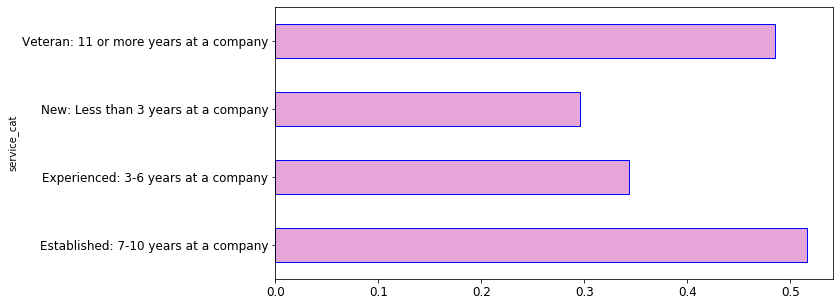

In [111]:
service_cat_dis_pivot.plot(kind='barh', legend=False, figsize=(10,5), fontsize=12,color=(0.8, 0.3, 0.7, 0.5),edgecolor='blue')

From above bar plot,from our intial analysis we can conclude that veteran and establised employees are leaving the organisation due to dissatisfaction with the company.Employees who have service more than 7 years in the organisation are likely to resign due to dissatisfaction.

##### Additional Goals
1)We have included missing value in dissatisfied column.we will explore and fill the missing values in other columns and try to aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?

2)How many people in each age group resgined due to some kind of dissatisfaction?

3)Perform analysis on individual suveys(DETE and TAFE)



In [112]:
combined_updated.isnull().sum()

age                      55
cease_date               16
dissatisfied              0
employment_status        54
gender                   59
id                        0
institute                 0
institute_service        88
position                 53
separationtype            0
institute_service_new    88
service_cat              88
dtype: int64

In [113]:
#institute_service,institute_service_new,service_cat are all same columns which are mention the lengthn of service
#in different ways
combined_updated=combined_updated.drop(["institute_service"],axis=1)


In [114]:
#How many people in each career stage resigned due to some kind of dissatisfaction?
pivot_tab=pd.pivot_table(combined_updated,values='dissatisfied',index='service_cat',aggfunc='sum')
pivot_tab

,dissatisfied
service_cat,
Established: 7-10 years at a company,32.0
Experienced: 3-6 years at a company,59.0
New: Less than 3 years at a company,57.0
Veteran: 11 or more years at a company,66.0


Above values show that Established profeesional leaved the company due to dissatisfaction.Even though the many new recruiters left the organisation,percentage of new employees left from total recruitment in last three years is 30%.

In [115]:
###### Cleaning up and transforming the age column
combined_updated["age"].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

From noticed above,cleaning up age column is trickier because we cannot apply same logic of "institute_service" column to age.
We do analysis on the present age values and do not fill any missing age values.

In [116]:
#df[df.Last_Name.notnull()]
# get the index of rows with nan values on column "institute_service"



combined_updated_age = combined_updated[combined_updated.age.notnull()]

#Other way of doing it
#index_rows = combined_updated[combined_updated["age"].isnull()].index
#combined_age= combined_updated.copy().drop(labels = index_rows)

In [117]:
combined_updated_age["age"]=combined_updated_age["age"].str.replace("  ","-").copy()

C:\Users\gsara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [118]:
combined_updated_age["age"]=combined_updated_age["age"].astype(str).str.strip()
combined_updated_age["age"].value_counts()



C:\Users\gsara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [119]:
#Now we will change the the column in age suitable to our analysis with the help of function and apply method.

def age (val):
    if val[0]=="2":
        return "20 -29"
    elif val[0]=="3":
        return "30 -40"
    elif val[0]=="4":
        return "40 -50"
    elif val[0]=="5":
        return "50 -60"
    else:
        return "60 and above"
        
    
        
        
        

In [120]:
combined_updated_age["age"]=combined_updated_age["age"].apply(age)

C:\Users\gsara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
#Let us check for the values
combined_updated_age["age"].value_counts()

40 -50          174
20 -29          139
30 -40          134
50 -60          126
60 and above     23
Name: age, dtype: int64

In [122]:
pivot_tab=pd.pivot_table(combined_updated_age,values=['dissatisfied'],index='age')

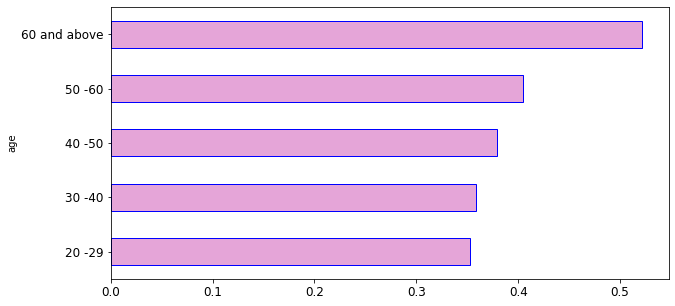

In [123]:
pivot_tab.plot(kind='barh', legend=False, figsize=(10,5), fontsize=12,color=(0.8, 0.3, 0.7, 0.5),edgecolor='blue')

People who are above age 50 and 60 resigned their job mainly due to job disatisfaction among other reasons

##### Analyze each survey separately to get to know which age group resigned due to what dis-satisfaction reason.

In [138]:
dete_resignations.columns

Index(['ID', 'SEPARATIONTYPE', 'CEASE_DATE', 'DETE_START_DATE',
       'ROLE_START_DATE', 'POSITION', 'CLASSIFICATION', 'REGION',
       'BUSINESS_UNIT', 'EMPLOYMENT_STATUS', 'CAREER_MOVE_TO_PUBLIC_SECTOR',
       'CAREER_MOVE_TO_PRIVATE_SECTOR', 'INTERPERSONAL_CONFLICTS',
       'JOB_DISSATISFACTION', 'DISSATISFACTION_WITH_THE_DEPARTMENT',
       'PHYSICAL_WORK_ENVIRONMENT', 'LACK_OF_RECOGNITION',
       'LACK_OF_JOB_SECURITY', 'WORK_LOCATION', 'EMPLOYMENT_CONDITIONS',
       'MATERNITY/FAMILY', 'RELOCATION', 'STUDY/TRAVEL', 'ILL_HEALTH',
       'TRAUMATIC_INCIDENT', 'WORK_LIFE_BALANCE', 'WORKLOAD',
       'NONE_OF_THE_ABOVE', 'GENDER', 'AGE', 'ABORIGINAL', 'TORRES_STRAIT',
       'SOUTH_SEA', 'DISABILITY', 'NESB', 'INSTITUTE_SERVICE', 'Dissatisfied'],
      dtype='object')

In [139]:
dete_resignations.AGE.value_counts()
#JOB_DISSATISFACTION,DISSATISFACTION_WITH_THE_DEPARTMENT,LACK_OF_JOB_SECURITY,WORK_LOCATION,EMPLOYMENT_CONDITIONS,RELOCATION,WORK_LIFE_BALANCE,WORKLOAD

41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger     1
Name: AGE, dtype: int64

In [140]:
dete_resignations.notnull().sum()


ID                                     311
SEPARATIONTYPE                         311
CEASE_DATE                             300
DETE_START_DATE                        283
ROLE_START_DATE                        271
POSITION                               308
CLASSIFICATION                         161
REGION                                 265
BUSINESS_UNIT                           32
EMPLOYMENT_STATUS                      307
CAREER_MOVE_TO_PUBLIC_SECTOR           311
CAREER_MOVE_TO_PRIVATE_SECTOR          311
INTERPERSONAL_CONFLICTS                311
JOB_DISSATISFACTION                    311
DISSATISFACTION_WITH_THE_DEPARTMENT    311
PHYSICAL_WORK_ENVIRONMENT              311
LACK_OF_RECOGNITION                    311
LACK_OF_JOB_SECURITY                   311
WORK_LOCATION                          311
EMPLOYMENT_CONDITIONS                  311
MATERNITY/FAMILY                       311
RELOCATION                             311
STUDY/TRAVEL                           311
ILL_HEALTH 

In [141]:
dete_resignations["Dissatisfied"].value_counts(dropna=False)


False    162
True     149
Name: Dissatisfied, dtype: int64

In [142]:
#Removing the columns which have not null values less than 275

dete_resignations_up = dete_resignations.dropna(thresh = 275, axis =1).copy()

In [143]:
dete_resignations_up.columns

Index(['ID', 'SEPARATIONTYPE', 'CEASE_DATE', 'DETE_START_DATE', 'POSITION',
       'EMPLOYMENT_STATUS', 'CAREER_MOVE_TO_PUBLIC_SECTOR',
       'CAREER_MOVE_TO_PRIVATE_SECTOR', 'INTERPERSONAL_CONFLICTS',
       'JOB_DISSATISFACTION', 'DISSATISFACTION_WITH_THE_DEPARTMENT',
       'PHYSICAL_WORK_ENVIRONMENT', 'LACK_OF_RECOGNITION',
       'LACK_OF_JOB_SECURITY', 'WORK_LOCATION', 'EMPLOYMENT_CONDITIONS',
       'MATERNITY/FAMILY', 'RELOCATION', 'STUDY/TRAVEL', 'ILL_HEALTH',
       'TRAUMATIC_INCIDENT', 'WORK_LIFE_BALANCE', 'WORKLOAD',
       'NONE_OF_THE_ABOVE', 'GENDER', 'AGE', 'Dissatisfied'],
      dtype='object')

Our goal is to find which of mentioned disatisfaction is the main reason for driving the employee out of the organisation.For our analysis, we further customize the age suitable to our needs.


In [144]:
def age (val):
    if val[0]=="2":
        return "20-29"
    elif val[0]=="3":
        return "30-40"
    elif val[0]=="4":
        return "40-50"
    elif val[0]=="5":
        return "50-60"
    else:
        return "60 and above"

In [145]:
dete_resignations_up["AGE"]=dete_resignations_up.AGE.astype(str)

In [146]:
dete_resignations_up["AGE"]=dete_resignations_up["AGE"].apply(age)
dete_resignations_up["AGE"].value_counts()

40-50           90
30-40           70
20-29           65
50-60           58
60 and above    28
Name: AGE, dtype: int64

In [149]:
selected_cols=['JOB_DISSATISFACTION', 'DISSATISFACTION_WITH_THE_DEPARTMENT','PHYSICAL_WORK_ENVIRONMENT', 'LACK_OF_RECOGNITION','LACK_OF_JOB_SECURITY', 
'WORK_LOCATION', 'EMPLOYMENT_CONDITIONS','RELOCATION','WORK_LIFE_BALANCE','WORKLOAD']

In [156]:
#Check if all the selected columns are in boolean type
dete_resignations_up[selected_cols] = dete_resignations_up[selected_cols].astype(bool)


In [161]:
#Percentage break of employees who are dissatified based on the duraion of the service
pivot_dete=pd.pivot_table(dete_resignations_up,values=selected_cols,index= "AGE")
pivot_dete

,DISSATISFACTION_WITH_THE_DEPARTMENT,EMPLOYMENT_CONDITIONS,JOB_DISSATISFACTION,LACK_OF_JOB_SECURITY,LACK_OF_RECOGNITION,PHYSICAL_WORK_ENVIRONMENT,RELOCATION,WORKLOAD,WORK_LIFE_BALANCE,WORK_LOCATION
AGE,,,,,,,,,,
20-29,0.061538,0.092308,0.123077,0.030769,0.169231,0.030769,0.246154,0.076923,0.169231,0.092308
30-40,0.114286,0.071429,0.142857,0.014286,0.057143,0.028571,0.242857,0.071429,0.228571,0.071429
40-50,0.066667,0.077778,0.088889,0.077778,0.100000,0.011111,0.111111,0.055556,0.233333,0.055556
50-60,0.172414,0.051724,0.155172,0.068966,0.137931,0.017241,0.137931,0.155172,0.293103,0.000000
60 and above,0.035714,0.071429,0.214286,0.000000,0.035714,0.000000,0.285714,0.107143,0.107143,0.071429


In [253]:
selected_cols=list(pivot_dete.columns)
len(selected_cols)

10

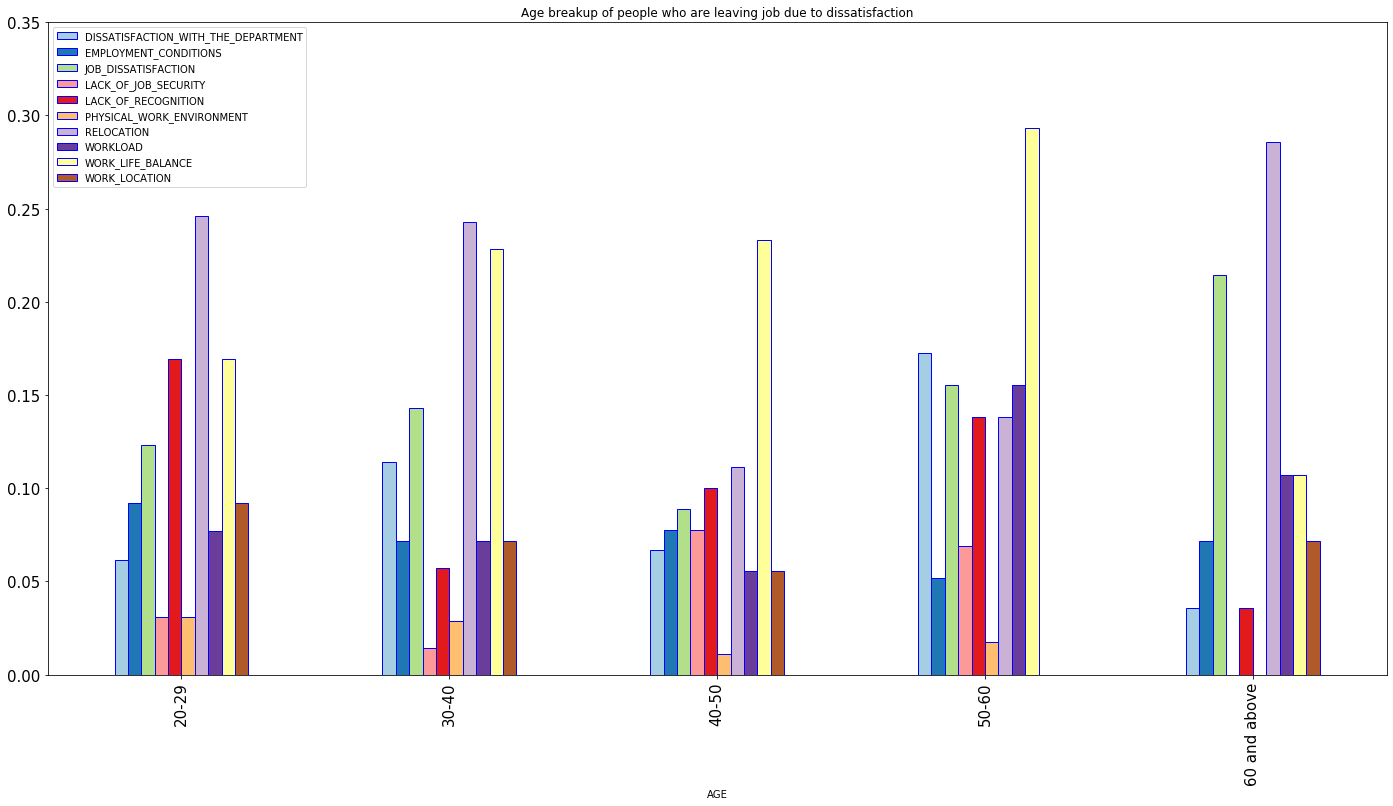

In [390]:
pivot_dete.plot(kind='bar', legend=True, figsize=(24,12), fontsize=15,edgecolor='blue',ylim=(0,0.35),colormap="Paired",title="Age breakup of people who are leaving job due to dissatisfaction")


##### From Dete Survey we can confirm,that work relocation has been the significant factor among all age groups especially are in late 20s,30s and 60s for resignation from the job.
##### The work life balance also had an impact of employee leaving the organisation.

###### Tafe survey analysis

In [336]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'Dissatisfied'],
      dtype='object')

IN tafe survey we will focus on the dissatifaction columns -'Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction'.THere is no specific dissatifaction  reason is mentioned in columns  of tafe survey.So we look at dissatisfied column

In [361]:
tafe_resignations["Dissatisfied"].value_counts()

False    241
True      91
Name: Dissatisfied, dtype: int64

In [362]:
def age (val):
    if val[0]=="2":
        return "20-29"
    elif val[0]=="3":
        return "30-40"
    elif val[0]=="4":
        return "40-50"
    elif val[0]=="5":
        return "50-60"
    else:
        return "60 and above"

In [364]:
tafe_resignations_up["AGE"]=dete_resignations_up["AGE"].apply(age)
tafe_resignations_up["AGE"].value_counts(dropna=False)

NaN             201
40-50            39
30-40            33
50-60            27
20-29            24
60 and above     16
Name: AGE, dtype: int64

In [388]:
tafe_resignations_up["Dissatisfied"]=tafe_resignations_up["Dissatisfied"].astype(bool)
pivot_tafe=pd.pivot_table(tafe_resignations_up,values="Dissatisfied",index= "AGE")
pivot_tafe

,Dissatisfied
AGE,
20-29,0.250000
30-40,0.333333
40-50,0.205128
50-60,0.481481
60 and above,0.312500


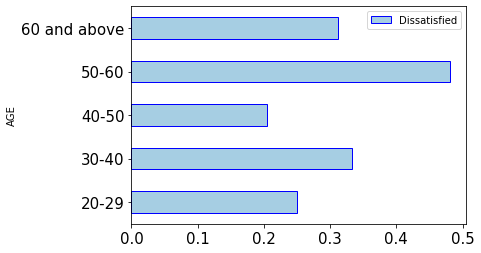

In [387]:
pivot_tafe.plot(kind='barh', legend=True, fontsize=15,edgecolor='blue',colormap="Paired")

From tafe survey we can conclude that senior age group employees(45%) form a significant portion in leaving the organisation due to dissatifaction.

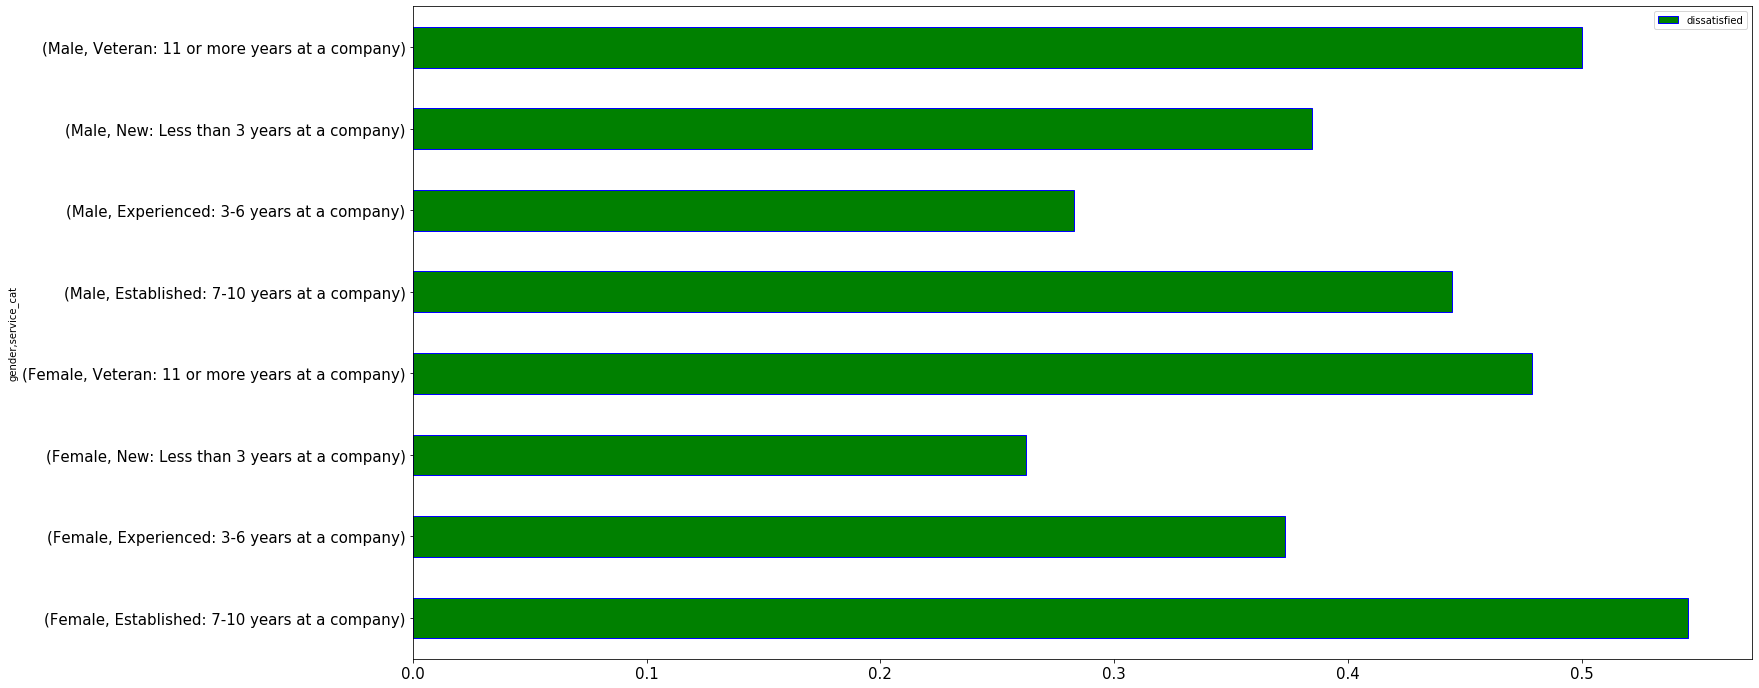

In [419]:
pivot_combined_gender=pd.pivot_table(combined_updated,values="dissatisfied",index= ["gender","service_cat"])
pivot_combined_gender.plot(kind='barh', legend=True, fontsize=15,edgecolor='blue',color="green",figsize=(24,12))


## Conclusion

In this project we analysed the exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.
O
ur goal is aligned with:

1)Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
Employees who have been longer left the organisation due to dissatisfaction.Eventhogh significant percentage of short term employees are leaving the organisation,they are much lower compared to senior employees.

2)Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Around 35% and 45 % of  the employees belonging to the age group 20-29 and 30-39 are leaving the organisation due to dissatisfaction.Old Employees are leaving the organisation even more around 55%.

We also found relocation is one of the main reasons for leaving the company.This can be seen across all age group of the people particularly among late 20s ,30s and 60s.


